### <font color='red'>Das hier stellt keine Musterlösung zu irgendetwas dar, sondern soll die numerische Integration an einem Beispiel zeigen, das explizit nicht auf den Aufgabenblättern behandelt wird, um keine direkten Überschneidungen zu riskieren. Es gibt auch keine Garantien für Fehlerfreiheit.</font>

# Numerische Integration am Beispiel des freien Falls mit Reibung


Ein nettes kleines Video zum freien Fall gibt es hier: https://www.youtube.com/watch?v=Oy-4mPro3w8&t=467s

Die Reibungskraft für große Geschwindigkeiten ist gegeben durch
\begin{align}
    F_D = \frac{1}{2} \rho v^2 C_d A,
\end{align}
wobei $A$ die frontale Angriffsfläche des fallenden Körpers ist, $C_d$ sein Reibungskoeffizient und $\rho$ die Dichte des umgebenden Mediums (z.B. Luft).
Zusammen mit der Gewichtskraft ergibt sich so für den Fall eines Fallschirmspringers
\begin{align}
    m \dot{v} = ma = \sum_i F_i = -mg + \frac{1}{2} \rho v^2 C_d A.
\end{align}
Das kann man analytisch lösen, möchte es aber vielleicht nicht. Man kann es auch numerisch integrieren. Wie immer gilt 
\begin{align}
    x(t+\Delta t) = x(t) + v(t)\Delta t,
\end{align}
wobei $x$ jetzt die Höhe des Fallschirmspringers bezeichnet, und 
\begin{align}
    v(t+\Delta t) = v(t) + a(t) \Delta t.
\end{align}
Hier sieht $a(t)$ allerdings anders aus, als wir es bisher kannten (da war $a=g$).
Es ist nämlich (siehe Gleichung 1):
\begin{align}
    a(t) = -g + \frac{v(t)^2}{2m}\rho C_d A.
\end{align}
Das können wir jetzt numerisch integrieren.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Für die Integration ist es am einfachsten, sich eine Funktion zu schreiben, die einen Zeitschritt ausführt. Um weniger schreiben zu müssen, können wir außerdem definieren, dass
\begin{equation}
    \kappa = \frac{\rho C_d A}{2m}.
\end{equation}

Das Verfahren, mit dem wir integrieren, heißt übrigens auch das "Euler-Verfahren", weshalb die Funktion unten auch `euler_step` heißt.

In [2]:
def euler_step(x, v, dt, kappa, g=9.81):
    """
    Propagiert x und v um Zeitschritt dt in der Zeit
    Args:
        x: x-Wert zur Zeit t
        v: v-Wert zur Zeit t
        dt: Zeitschritt
        kappa: Variable in Gleichung
        g: Erdbeschleunigung
        
    Returns:
        x, v: x und v zur Zeit t+dt
    """
    # x(t+dt) = x(t) + v(t) * dt, "x += 1" entspricht "x (neu) = x (alt) + 1"
    x += v * dt
    # v(t+dt) = v(t) + a(t) * dt, wobei a(t) = -g + kappa * v^2 ist
    v += (-g + kappa * v**2) * dt
    
    return x, v

Jetzt können wir uns unsere Variablen definieren:

In [3]:
x0 = 2000 # m, Anfangshöhe des Fallschirmspringers
v0 = 0 # m/s, Anfangsgeschwindigkeit des Fallschirmspringers
dt = 0.001 # s, Zeitschritt für die Integration

m = 80 # kg
C_d = 1.1 # etwa der Reibungskoeffizient eines Menschen, siehe https://www.engineeringtoolbox.com/drag-coefficient-d_627.html
A = 0.7 # Die Angriffsfläche können wir als 0.5m^2 bis 1m^2 approximieren ("Breite mal Höhe")
rho = 1.205 # kg/m^3, Dichte von Luft bei 20°C und 1atm, wir ignorieren hier Dichteveränderungen in verschiedenen Höhen
kappa = rho * A * C_d / (2*m)

Zur Integration können wir jetzt eine `for`-Schleife nutzen. Wir möchten aber nur solange integrieren, bis der Fallschirmspringer seinen Fallschirm öffnet (bei ca 700m Höhe). Wenn wir es uns etwas einfacher machen wollen, können wir auch eine `while` Schleife nehmen. Dann müssen wir nicht ausprobieren, wie viele Zeitschritte wir brauchen, bis der Fallschirmspringer auf 700m Höhe ist, sondern können das als Wiederholungsbedingung der Schleife nehmen. Die `while`-Schleife funktioniert so:
```python
while Bedingung:
    mach was
```
Das können wir in unserem Fall anwenden als:
```python
x_t = [x0]
while x_t[-1] > 700:
    integiere DGL
    x_t.append(neuer x-Wert)
```
Vorsicht! Hier können wir leicht eine Endlosschleife erzeugen, indem wir z.B. keine neuen Werte an `x_t` anhängen!

In [4]:
x_t = [x0] # Liste, deren erster (und damit auch letzter!) Eintrag x0 ist
v_t = [v0] # same für v und v0
while x_t[-1] > 700:
    # Berechne neue Werte, indem die Funktion euler_step aufgerufen wird.
    # x_t[-1] ist der letzte Wert in der Liste, also der aktuellste x-Wert.
    # Wir wiederholen die Schleife, solange der neuste x-Wert größer als 700m ist
    x, v = euler_step(x_t[-1], v_t[-1], dt, kappa)
    x_t.append(x)
    v_t.append(v)

Dasselbe könnten wir auch über eine for-Schleife machen, dann müssten wir uns aber die Anzahl der Integrationsschritte überlegen. Da wir nicht genau wissen, zu welchem Zeitpunkt der Fallschirmspringer seinen Fallschirm öffnet (also wann genau er bei der "Öffnungshöhe" 700m angekommen ist), müssen wir jetzt allerdings schätzen. Das könnte z.B. so aussehen:

```python
x_t = [x0] # Liste, deren erster (und damit auch letzter!) Eintrag x0 ist
v_t = [v0] # same für v und v0
t_open = 30 # grobe Schätzung der Zeit, bei der der Fallschirm geöffnet wird
num_steps = int(t_open / dt) # Anzahl der Schritte
for _ in range(num_steps):
    # Berechne neue Werte, indem die Funktion euler_step aufgerufen wird.
    # x_t[-1] ist der letzte Wert in der Liste, also der aktuellste x-Wert.
    # Wir wiederholen die Schleife, solange der neuste x-Wert größer als Null ist
    x, v = euler_step(x_t[-1], v_t[-1], dt, kappa, g)
    x_t.append(x)
    v_t.append(v)
```
Der `_` in der Definition der for-Schleife sagt python, dass wir die Variable mit der Schleifennummer gar nicht unbedingt brauchen (wir nutzen sie nie).

Wir wissen$^*$, dass die analytische Lösung für die Geschwindigkeit
\begin{align}
    v(t) = \sqrt{\frac{g}{\kappa}} \tanh\left(\sqrt{g\kappa}t\right)
\end{align}
ist.

$^*$Zum Beispiel von hier: http://www.jasoncantarella.com/downloads/AJP001242.pdf

In [5]:
def v_analytisch(t, kappa, g=9.81):
    """
    Berechnet die analytische Lösung v(t)
    Args:
        t: Zeit
        kappa: Variable siehe Gleichung 1
        g: Erdbeschleunigung
    Returns:
        v(t): Geschwindigkeit zum Zeitpunkt t
    """
    return -np.sqrt(g / kappa) * np.tanh(np.sqrt(g * kappa) * t)

Jetzt können wir das ganze plotten!

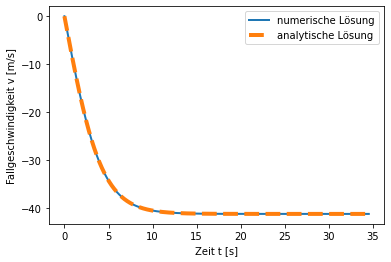

In [6]:
# Anzahl der Zeitschritte mal Länge eines Schritts gleich Gesamtzeit
t = np.linspace(0, len(x_t)*dt, len(x_t))

fig, ax = plt.subplots()
ax.plot(t, v_t, label='numerische Lösung', linewidth=2)
ax.plot(t, v_analytisch(t, kappa), label='analytische Lösung', linestyle='dashed', linewidth=4)
ax.set_xlabel('Zeit t [s]')
ax.set_ylabel('Fallgeschwindigkeit v [m/s]')
ax.legend()
plt.show()

Das passt ziemlich gut zusammen! Wir beobachten, dass die Geschwindigkeit sich hier eine "terminalen" Geschwindigkeit annhähert. Das ist der Punkt, an dem sich die Reibungskraft (nach oben) und die Gewichtskraft (nach unten) ausgleichen und der Fallschirmspringer somit keine Beschleunigung mehr erfährt, da keine Netto-Kraft wirkt. 

Die Fallhöhe in Abhängigkeit von der Zeit sieht so aus:

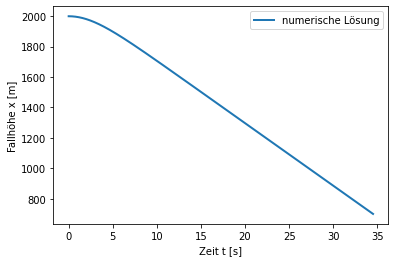

In [7]:
fig, ax = plt.subplots()
ax.plot(t, x_t, label='numerische Lösung', linewidth=2)
ax.set_xlabel('Zeit t [s]')
ax.set_ylabel('Fallhöhe x [m]')
ax.legend()
plt.show()